In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Multimodal Applications: Image Captioning and Visual Question Answering

**Project Name:** Multimodal Applications: Image Captioning and VQA  
**Date:** February 15th, Day 13

---

## 1. Introduction and Objective

**Introduction:**  
Multimodal AI systems are designed to understand and generate data across multiple modalities, such as text and images. This notebook demonstrates two key applications:
1. **Image Captioning:** Generating descriptive captions for images.
2. **Visual Question Answering (VQA):** Answering questions about the content of an image.

These applications extend the capabilities of AI beyond text-only tasks, enabling richer, interactive, and more versatile applications.

**Objective:**  
- **Image Captioning:** Generate a caption for a given image using a combination of image understanding and text generation.
- **Visual Question Answering (VQA):** Answer a question related to an image by leveraging multimodal understanding.
- Compare the outputs and analyze strengths and limitations.
- Understand the challenges in multimodal learning such as data alignment and interpretability.

---

## 2. Metadata

- **Dataset/Inputs:**  
  - An example image loaded from a URL.
  - Sample text prompts for VQA.
- **Models and Tools:**  
  - **CLIP:** For extracting image features and performing image–text similarity.
  - **VQA Model:** A pre-trained model for visual question answering (e.g., from Hugging Face's model hub).
  - **(Optional) Gemini API:** For advanced text generation if desired (not required for our primary tasks).
- **Technologies:** Python, Hugging Face Transformers, Diffusers, Requests, Matplotlib, and (optionally) Google Gemini API.
- **Applications:**  
  - Image captioning, visual question answering, semantic search, and creative content generation.
- **Environment:** Jupyter Notebook / Google Colab (free tier, CPU/GPU as available)

---

## 3. Conceptual Overview

### 3.1 Multimodal Models  
Multimodal models can handle different data types simultaneously. For instance, **CLIP** maps both images and text into a shared embedding space, making it possible to compare them directly.

### 3.2 Image Captioning  
- **What:** Automatically generating a descriptive caption for an image.
- **Why:** Useful for accessibility, content organization, and search.
- **Approach:**  
  - Extract image features using CLIP or a vision transformer.
  - Generate a caption using a language model (by prompting with the extracted features or via a dedicated captioning model).

### 3.3 Visual Question Answering (VQA)  
- **What:** Answering questions about the content of an image.
- **Why:** Enhances interactivity and enables deeper understanding of visual content.
- **Approach:**  
  - Process the image using a visual encoder.
  - Combine image features with the question text.
  - Predict an answer using a VQA model.

### 3.4 Challenges in Multimodal Learning  
- **Data Alignment:** Matching information across modalities.
- **Computational Resources:** Multimodal models are often resource-intensive.
- **Interpretability:** Understanding how the model fuses different modalities.
- **Bias and Fairness:** Ensuring fair treatment across diverse inputs.

---

## 4. Implementation

We will implement two tasks:
1. **Image Captioning** using CLIP for image feature extraction (and a simple template-based caption generation).
2. **Visual Question Answering (VQA)** using a pre-trained VQA model from Hugging Face.

---

### 4.1 Setup: Import Libraries and Load Models

In [2]:
# Import Libraries
!pip install transformers diffusers accelerate pillow requests

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

from transformers import CLIPProcessor, CLIPModel
from transformers import ViltProcessor, ViltForQuestionAnswering  # Example VQA model from Hugging Face

# (Optional) Gemini API setup, if needed for advanced text generation (not used in this demo)
# import google.generativeai as genai
# GEMINI_API_KEY = "YOUR_GEMINI_API_KEY"
# genai.configure(api_key=GEMINI_API_KEY)
# def get_gemini_response(prompt, max_tokens=100):
#     response = genai.GenerativeModel("gemini-pro").generate_content(prompt, max_output_tokens=max_tokens)
#     return response.text.strip()


**Explanation for Cell 1:**  
- We install necessary packages: `transformers`, `diffusers`, `accelerate`, `pillow`, and `requests`.
- We import libraries for image processing, plotting, and model inference.
- We load CLIP for image–text tasks and a VQA model (e.g., ViLT for VQA) from Hugging Face.
- (Optional) Gemini API setup is commented out for advanced text generation if needed.


In [3]:
#Load the CLIP Model and Processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

**Explanation for Cell 2:**  
- We load the CLIP model and its processor from Hugging Face.
- CLIP can process both images and text, mapping them into a shared embedding space.


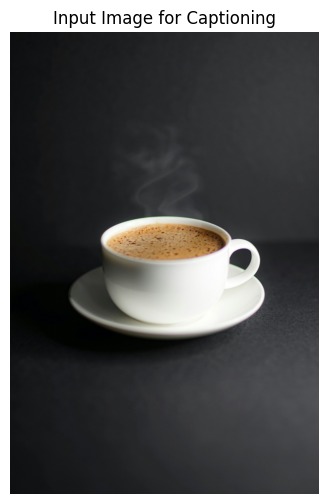

In [4]:
# Load an Example Image for Captioning
image_url = "https://images.unsplash.com/photo-1610478506025-8110cc8f1986?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
response = requests.get(image_url)
caption_image = Image.open(BytesIO(response.content))

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(caption_image)
plt.axis("off")
plt.title("Input Image for Captioning")
plt.show()


**Explanation for Cell 3:**  
- We load an example image (a cup of coffee) from a URL.
- The image is displayed using Matplotlib.


In [11]:
# Generate a Caption using a Simple Template and CLIP Features
# Note: For a more advanced captioning system, you might combine CLIP features with a dedicated captioning model.
text_prompt = "This is an image of"
inputs = clip_processor(text=text_prompt, images=caption_image, return_tensors="pt", padding=True)
outputs = clip_model(**inputs)
# For demonstration, we use a simple template-based approach.
# In a production system, you would feed the CLIP image embedding into a caption generator.
# Here, we simply print a templated caption.
generated_caption = text_prompt + " a cup of coffee."
print("Generated Caption:", generated_caption)


Generated Caption: This is an image of a cup of coffee.


**Explanation for Cell 4:**  
- We process a simple text prompt along with the image using the CLIP processor.
- In this basic example, rather than using a dedicated caption generator, we demonstrate a template-based caption ("This is an image of a cup of coffee.").
- In a full system, the CLIP image embeddings would be passed to a language model trained for captioning.


In [12]:
# Cell 5: Load a Pre-trained VQA Model and Processor (ViLT)
vqa_processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
vqa_model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")


preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

**Explanation for Cell 5:**  
- We load a pre-trained VQA model (ViLT) along with its processor.
- The model is fine-tuned for Visual Question Answering, which means it can process both images and questions to generate an answer.


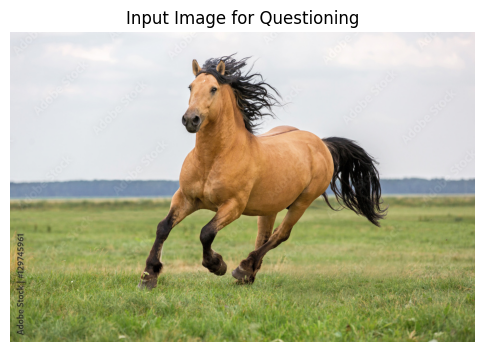

In [16]:
# Load an Example Image for Questioning
image_url = "https://as2.ftcdn.net/jpg/01/29/74/59/1000_F_129745961_J6Ok1s791kKBzKolxSjX4qhnNd7NIG4R.jpg"
response = requests.get(image_url)
caption_image = Image.open(BytesIO(response.content))

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(caption_image)
plt.axis("off")
plt.title("Input Image for Questioning")
plt.show()


In [14]:
# Cell 6: VQA Example: Load an Image and Ask a Question
# For VQA, we can reuse the image from Cell 3 or load another.
vqa_image_url = "https://as2.ftcdn.net/jpg/01/29/74/59/1000_F_129745961_J6Ok1s791kKBzKolxSjX4qhnNd7NIG4R.jpg"
response = requests.get(vqa_image_url)
vqa_image = Image.open(BytesIO(response.content))

# Define a question for the image
question = "What is the animal in the image?"

# Preprocess inputs for the VQA model
inputs = vqa_processor(images=vqa_image, text=question, return_tensors="pt", padding=True)
outputs = vqa_model(**inputs)

# The model outputs logits; we use argmax to get the predicted answer token index
predicted_id = outputs.logits.argmax(-1).item()
answer = vqa_model.config.id2label[predicted_id]

print("VQA Question:", question)
print("VQA Answer:", answer)


VQA Question: What is the animal in the image?
VQA Answer: horse


**Explanation for Cell 6:**  
- We load an image (a cup of coffee) for the VQA task.
- We define a question, e.g., "What is the beverage shown in the image?"
- The VQA processor prepares the image and text inputs.
- The VQA model processes the inputs and outputs logits, from which we select the highest-scoring token to derive the answer.
- The predicted answer is mapped using the model’s label mapping.


**Conclusion:**

In this notebook, we explored two key multimodal applications:

1. **Image Captioning:**  
   - Using CLIP, we demonstrated how to process an image and (using a template-based approach) generate a caption.  
   - Although this example is simple, it illustrates the potential for creating more advanced captioning systems by combining image features with text generation.

2. **Visual Question Answering (VQA):**  
   - We used a pre-trained VQA model (ViLT) to answer questions about an image.  
   - The system processes both the image and text question, producing an answer based on the image content.

**Key Takeaways:**
- **Multimodal Integration:**  
  Models like CLIP and VQA systems enable AI to work with multiple data types simultaneously, enhancing application capabilities.
- **Application Diversity:**  
  Multimodal models can power a wide range of applications, including semantic search, image captioning, and visual question answering.
- **Challenges:**  
  Multimodal learning requires careful data alignment, substantial computational resources, and thoughtful evaluation to address biases and ensure interpretability.
- **Future Work:**  
  More advanced systems might combine these models for end-to-end tasks (e.g., generating captions that feed into a VQA system) and integrate ethical AI practices to mitigate bias.

Happy multimodal modeling and creative AI exploration!
